<a href="https://colab.research.google.com/github/andysontran/2-CHL5230-F23/blob/main/K-NN%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into '2-CHL5230-F23'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 74 (delta 27), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (74/74), 1.98 MiB | 10.21 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23/2-CHL5230-F23
Feature: 0, Score: 0.03106
Feature: 1, Sco

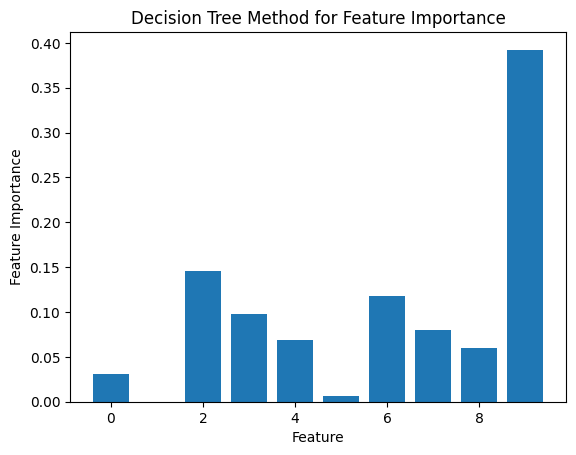

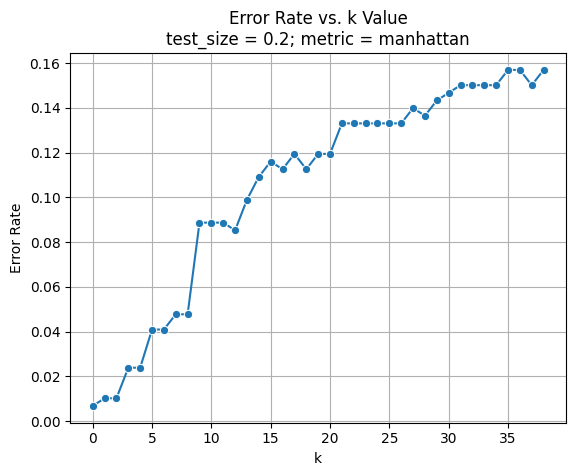

[[57  0  0  0]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 2  1  0 95]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        57
           1       0.98      1.00      0.99        58
           2       1.00      1.00      1.00        80
           3       1.00      0.97      0.98        98

    accuracy                           0.99       293
   macro avg       0.99      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



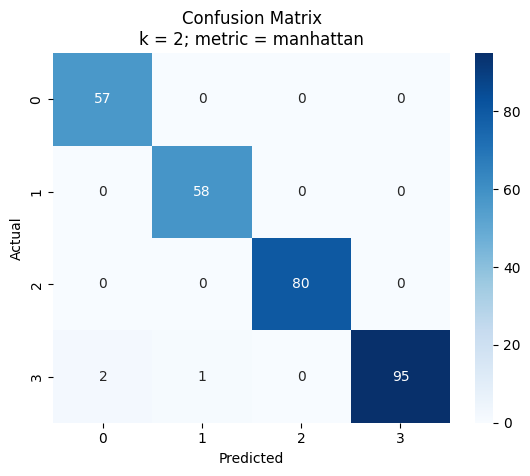

Feature: 0, Score: 0.07782
Feature: 1, Score: 0.05324
Feature: 2, Score: 0.03072
Feature: 3, Score: 0.03072
Feature: 4, Score: 0.00478
Feature: 5, Score: 0.02116
Feature: 6, Score: 0.01775
Feature: 7, Score: 0.05256


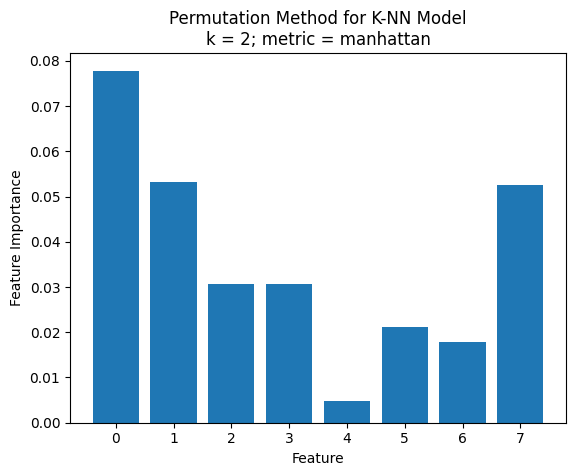

In [37]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Clone files on repository to Drive
!git clone https://github.com/andysontran/2-CHL5230-F23.git

# Set working directory
%cd 2-CHL5230-F23/

# Read CSV file into Pandas df
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features and label for feature importance
## Features: Age	Gender	Air Pollution	Alcohol Usage	Genetic Risk	Lung Disease
##           Obesity	Smoking	Passive Smoker	Chest Pain	Coughing of Blood
## Label:    Severity
X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Passive Smoker','Chest Pain',
        'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision tree for feature importance
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()
# Fit the model
model.fit(X_train, y_train)
# Get importance
importance = model.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Decision Tree Method for Feature Importance'
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()


# Split data into features and label for K-NN (cut-off: >0.05)
## Features: Air Pollution	Alcohol Usage	Genetic Risk  Obesity
##.          Passive Smoker	 Chest Pain	 Coughing of Blood
## Label:    Severit
X = df[['Air Pollution','Alcohol Usage','Genetic Risk','Smoking','Obesity',
        'Passive Smoker','Chest Pain','Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance metric used
met = 'manhattan'

# Check error rate for k = 1 to 40
error_rate = []

for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k, metric = met)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plot line graph of error rate
sns.lineplot(error_rate, marker = 'o')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. k Value\ntest_size = 0.2; metric = ' + met)

plt.show()

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K value used
k = 2

# Initialize K-NN classifier and fit the model
knn = KNeighborsClassifier(n_neighbors = k, metric = met)
knn.fit(X_train, y_train)

# Predict using test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualize K-NN results using confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred, labels = classes), annot = True,
            xticklabels = classes, yticklabels = classes, cmap = 'Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
title = 'Confusion Matrix\nk = ' + str(k) + '; metric = ' + met
plt.title(title)

plt.show()

# Permutation for feature importance with K-NN for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Fit the model
results = permutation_importance(knn, X_test, y_test, scoring = 'accuracy')
# Get importance
importance = results.importances_mean
# Summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
title = 'Permutation Method for K-NN Model\nk = ' + str(k) + '; metric = ' + met
plt.title(title)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()